# MultiLens line-of-sight environment impact

### this notebooks analyses the impact of LOS structure away from the Einstein radius and its impact on the observables and convergence field

In [1]:
from MultiLens.lens_assembly import LensAssembly
from MultiLens.Profiles.point_mass import PointMass
from MultiLens.lens_object import LensObject
from MultiLens.Cosmo.cosmo import CosmoProp
import MultiLens.Utils.utils as utils
from MultiLens.MultiLens import MultiLens
from MultiLens.Profiles.gaussian import Gaussian
from MultiLens.numerics import Numerics
import MultiLens.Utils.constants as const
from MultiLens.Utils.halo_param import HaloParam


import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="dark")
from mpl_toolkits.axes_grid1 import AxesGrid, make_axes_locatable
cmap = sns.cubehelix_palette(start=0, light=1, as_cmap=True)

In [2]:
lensAssembly = LensAssembly()
cosmo = CosmoProp()
multiLens = MultiLens()
gaussian = Gaussian()
numerics = Numerics()
haloParam = HaloParam()

## choice of configuration

In [3]:
z_lens = 0.5
z_source = 2
z_array = np.array([0.1, 0.3, 0.5, 0.7, 0.9])

lens_type_main = 'SIS'
sigma_v_main = 200*1000.
pos_x_main = 0
pos_y_main = 0

lens_type_los = 'NFW' # 'NFW', 'SIS'
r = 8
theta = np.pi/6
pos_x_los = r*np.sin(theta)
pos_y_los = r*np.cos(theta)
mass_los = 10**13

sigma_source = 0.02*const.arcsec
x_array, y_array = utils.make_grid(300, 0.01)

## define the lenses

In [4]:
kappa_full_list = []
kappa_born_list = []
kappa_analytic_list = []
mag_full_list = []
mag_born_list = []
mag_analytic_list = []
image_full_list = []
image_born_list = []
image_analytic_list = []
Dds_0 = cosmo.D_xy(z_lens, z_source)

for i in range(len(z_array)):
    z = z_array[i]
    Dds = cosmo.D_xy(z, z_source)
    factor = Dds_0/Dds
    lensObject = LensObject(redshift=z, type=lens_type_los, approximation='weak', main=False)
    if lens_type_los == 'point_mass':
        kwargs_profile = {'mass': mass_los, 'pos_x': pos_x_los, 'pos_y': pos_y_los}
    elif lens_type_los=='NFW':
        r200, rho_s, Rs, c = haloParam.profileMain(mass_los, z)
        kwargs_profile = {'rho_s': rho_s, 'Rs': Rs, 'pos_x': pos_x_los, 'pos_y': pos_y_los}
    elif lens_type_los == 'SIS':
        kwargs_profile = {'sigma_v': sigma_v_los, 'pos_x': pos_x_los, 'pos_y': pos_y_los}
    lensObject.add_info('kwargs_profile', kwargs_profile)
    lensAssembly.add_lens(lensObject)

    lensObject = LensObject(redshift=z_lens, type=lens_type_main, approximation='weak', main=True)
    if lens_type_main == 'point_mass':
        kwargs_profile = {'mass': mass_main, 'pos_x': pos_x_main, 'pos_y': pos_y_main}
    elif lens_type_main=='NFW':
        r200, rho_s, Rs, c = haloParam.profileMain(mass, z)
        kwargs_profile = {'rho_s': rho_s, 'Rs': Rs, 'pos_x': pos_x_main, 'pos_y': pos_y_main}
    elif lens_type_main == 'SIS':
        kwargs_profile = {'sigma_v': sigma_v_main, 'pos_x': pos_x_main, 'pos_y': pos_y_main}
    lensObject.add_info('kwargs_profile', kwargs_profile)
    lensAssembly.add_lens(lensObject)

    beta_x_full, beta_y_full = multiLens.full_ray_tracing(lensAssembly, z_source, x_array, y_array)
    beta_x_born, beta_y_born = multiLens.born_ray_tracing(lensAssembly, z_source, x_array, y_array)
    beta_x_analytic, beta_y_analytic = multiLens.analytic_mapping(lensAssembly, z_source, x_array, y_array, LOS_corrected=True)
    flux_full = gaussian.function(beta_x_full, beta_y_full, amp=1, sigma_x=sigma_source, sigma_y=sigma_source, center_x=0, center_y=0)
    flux_born = gaussian.function(beta_x_born, beta_y_born, amp=1, sigma_x=sigma_source, sigma_y=sigma_source, center_x=0, center_y=0)
    flux_analytic = gaussian.function(beta_x_analytic, beta_y_analytic, amp=1, sigma_x=sigma_source, sigma_y=sigma_source, center_x=0, center_y=0)
    
    image_full = utils.array2image(flux_full)
    image_born = utils.array2image(flux_born)
    image_analytic = utils.array2image(flux_analytic)
    image_full_list.append(image_full)
    image_born_list.append(image_born)
    image_analytic_list.append(image_analytic)

    kappa_full = numerics.kappa(beta_x_full, beta_y_full, x_array, y_array)
    kappa_born = numerics.kappa(beta_x_born, beta_y_born, x_array, y_array)
    kappa_analytic = numerics.kappa(beta_x_analytic, beta_y_analytic, x_array, y_array)
    kappa_full_list.append(kappa_full)
    kappa_born_list.append(kappa_born)
    kappa_analytic_list.append(kappa_analytic)
    mag_full = numerics.magnification(beta_x_full, beta_y_full, x_array, y_array)
    mag_born = numerics.magnification(beta_x_born, beta_y_born, x_array, y_array)
    mag_analytic = numerics.magnification(beta_x_analytic, beta_y_analytic, x_array, y_array)
    mag_full_list.append(mag_full)
    mag_born_list.append(mag_born)
    mag_analytic_list.append(mag_analytic)
    lensAssembly.clear()

LensAssembly class cleared. No lens object specified.
LensAssembly class cleared. No lens object specified.
LensAssembly class cleared. No lens object specified.
LensAssembly class cleared. No lens object specified.
LensAssembly class cleared. No lens object specified.


## numerical mapps

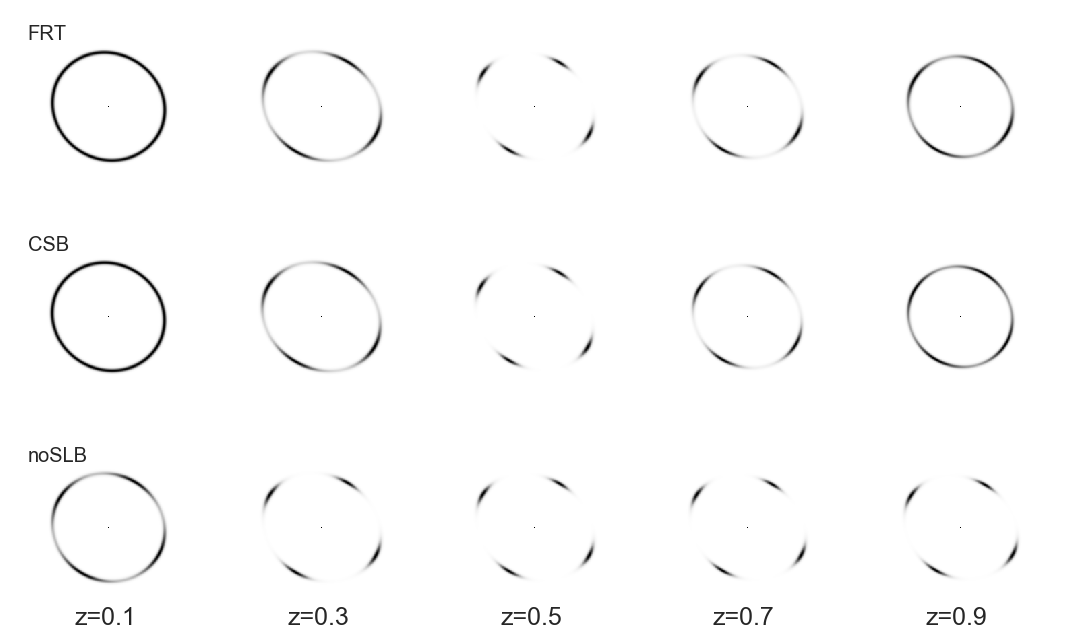

'\nSpectral, summer, coolwarm, Wistia_r, pink_r, Set1, Set2, Set3, brg_r, Dark2, prism, PuOr_r, afmhot_r, terrain_r, PuBuGn_r,\nRdPu, gist_ncar_r, gist_yarg_r, Dark2_r, YlGnBu, RdYlBu, hot_r, gist_rainbow_r, gist_stern, PuBu_r, cool_r, cool, gray,\ncopper_r, Greens_r, GnBu, gist_ncar, spring_r, gist_rainbow, gist_heat_r, Wistia, OrRd_r, CMRmap, bone, gist_stern_r,\nRdYlGn, Pastel2_r, spring, terrain, YlOrRd_r, Set2_r, winter_r, PuBu, RdGy_r, spectral, rainbow, flag_r, jet_r, RdPu_r,\ngist_yarg, BuGn, Paired_r, hsv_r, bwr, cubehelix, Greens, PRGn, gist_heat, spectral_r, Paired, hsv, Oranges_r, prism_r,\nPastel2, Pastel1_r, Pastel1, gray_r, jet, Spectral_r, gnuplot2_r, gist_earth, YlGnBu_r, copper, gist_earth_r, Set3_r,\nOrRd, gnuplot_r, ocean_r, brg, gnuplot2, PuRd_r, bone_r, BuPu, Oranges, RdYlGn_r, PiYG, CMRmap_r, YlGn, binary_r, \ngist_gray_r, Accent, BuPu_r, gist_gray, flag, bwr_r, RdBu_r, BrBG, Reds, Set1_r, summer_r, GnBu_r, BrBG_r, Reds_r, RdGy,\nPuRd, Accent_r, Blues, autumn_r, 

In [5]:
n = len(kappa_born_list)
f, axes = plt.subplots(3, n, figsize=(n*3, 9), sharex=False, sharey=False)
cmap_plot = "Greys" #"gist_heat"# "Greys"
for i in range(n):
    image_full = image_full_list[i]
    image_born = image_born_list[i]
    image_analytic = image_analytic_list[i]
    kappa_full = kappa_full_list[i]
    kappa_born = kappa_born_list[i]
    mag_full = mag_full_list[i]
    mag_born = mag_born_list[i]
    z = z_array[i]
    
    ax = axes[0][i]
    im=ax.matshow(image_full,origin='lower', cmap=cmap_plot)
    if i == 0:
        ax.text(30, 250, "FRT", fontsize=20)
    plt.setp(ax.get_xticklabels(), visible=False)
    plt.setp(ax.get_yticklabels(), visible=False)

    ax = axes[1][i]
    if i == 0:
        ax.text(30, 250, "CSB", fontsize=20)
    im=ax.matshow(image_analytic,origin='lower', cmap=cmap_plot)
    plt.setp(ax.get_xticklabels(), visible=False)
    plt.setp(ax.get_yticklabels(), visible=False)
    
    ax = axes[2][i]
    if i == 0:
        ax.text(30, 250, "noSLB", fontsize=20)
    ax.text(100, 6, "z=%s"%(z), fontsize=25)
    im=ax.matshow(image_born,origin='lower', cmap=cmap_plot)
    plt.setp(ax.get_xticklabels(), visible=False)
    plt.setp(ax.get_yticklabels(), visible=False)

f.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.05, hspace=0.05)
#plt.savefig('/Users/sibirrer/Cosmology/Strong_Lensing/Papers/StrongWeak/environment_z.pdf', format='pdf')
plt.show()

"""
Spectral, summer, coolwarm, Wistia_r, pink_r, Set1, Set2, Set3, brg_r, Dark2, prism, PuOr_r, afmhot_r, terrain_r, PuBuGn_r,
RdPu, gist_ncar_r, gist_yarg_r, Dark2_r, YlGnBu, RdYlBu, hot_r, gist_rainbow_r, gist_stern, PuBu_r, cool_r, cool, gray,
copper_r, Greens_r, GnBu, gist_ncar, spring_r, gist_rainbow, gist_heat_r, Wistia, OrRd_r, CMRmap, bone, gist_stern_r,
RdYlGn, Pastel2_r, spring, terrain, YlOrRd_r, Set2_r, winter_r, PuBu, RdGy_r, spectral, rainbow, flag_r, jet_r, RdPu_r,
gist_yarg, BuGn, Paired_r, hsv_r, bwr, cubehelix, Greens, PRGn, gist_heat, spectral_r, Paired, hsv, Oranges_r, prism_r,
Pastel2, Pastel1_r, Pastel1, gray_r, jet, Spectral_r, gnuplot2_r, gist_earth, YlGnBu_r, copper, gist_earth_r, Set3_r,
OrRd, gnuplot_r, ocean_r, brg, gnuplot2, PuRd_r, bone_r, BuPu, Oranges, RdYlGn_r, PiYG, CMRmap_r, YlGn, binary_r, 
gist_gray_r, Accent, BuPu_r, gist_gray, flag, bwr_r, RdBu_r, BrBG, Reds, Set1_r, summer_r, GnBu_r, BrBG_r, Reds_r, RdGy,
PuRd, Accent_r, Blues, autumn_r, autumn, cubehelix_r, nipy_spectral_r, ocean, PRGn_r, Greys_r, pink, binary, winter,
gnuplot, RdYlBu_r, hot, YlOrBr, coolwarm_r, rainbow_r, Purples_r, PiYG_r, YlGn_r, Blues_r, YlOrBr_r, seismic, Purples,
seismic_r, RdBu, Greys, BuGn_r, YlOrRd, PuOr, PuBuGn, nipy_spectral, afmhot

"""

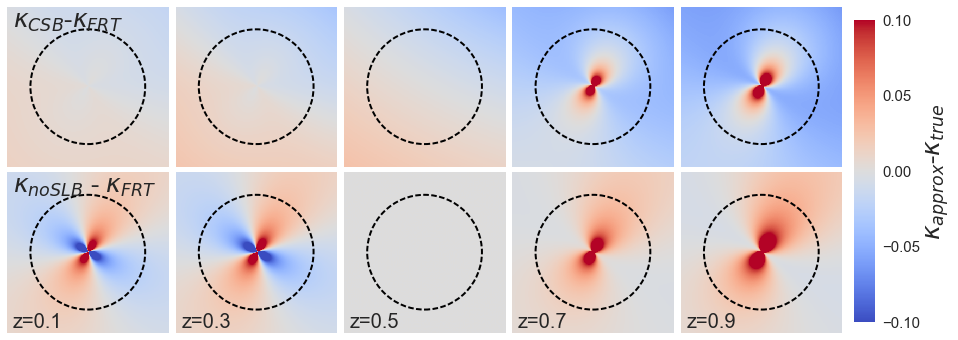

In [6]:
# kappa mapps vs projected mass density
fig, axes = plt.subplots(2, n, figsize=(n*3, 6), sharex=False, sharey=False)
n_pix = len(kappa_full)
for i in range(n):
    image_full = image_full_list[i]
    image_born = image_born_list[i]
    image_analytic = image_analytic_list[i]
    kappa_full = kappa_full_list[i]
    kappa_born = kappa_born_list[i]
    kappa_analytic = kappa_analytic_list[i]
    mag_full = mag_full_list[i]
    mag_born = mag_born_list[i]
    z = z_array[i]
    

    ax = axes[0][i]
    im=ax.matshow(kappa_analytic - kappa_full,origin='lower', vmin=-0.1, vmax=0.1, cmap="coolwarm")
    plt.setp(ax.get_xticklabels(), visible=False)
    plt.setp(ax.get_yticklabels(), visible=False)
    circle = plt.Circle((n_pix/2., n_pix/2.), n_pix/2.8, color='k', linewidth=2.0, linestyle='--', fill=False)
    ax.add_artist(circle)
    if i == 0:
        ax.text(10, 260, r"$\kappa_{CSB}$-$\kappa_{FRT}$", fontsize=25)

        
    ax = axes[1][i]
    ax.text(10, 10, "z=%s"%(z), fontsize=20)
    im=ax.matshow(kappa_born - kappa_full,origin='lower', vmin=-0.1, vmax=0.1, cmap="coolwarm")
    plt.setp(ax.get_xticklabels(), visible=False)
    plt.setp(ax.get_yticklabels(), visible=False)
    circle = plt.Circle((n_pix/2., n_pix/2.), n_pix/2.8, color='k', linewidth=2.0, linestyle='--', fill=False)
    ax.add_artist(circle)
    if i == 0:
        ax.text(10, 260, r"$\kappa_{noSLB}$ - $\kappa_{FRT}$", fontsize=25)

fig.subplots_adjust(right=0.94)
cbar_ax = fig.add_axes([0.91, 0.15, 0.02, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax, ticks=[-0.1,-0.05,0,0.05,0.1])    
cbar.ax.set_ylabel(r'$\kappa_{approx}$-$\kappa_{true}$', fontsize=25)
cbar.ax.tick_params(labelsize=15)

f.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=0.9, top=None, wspace=0.03, hspace=0.03)
#plt.savefig('/Users/sibirrer/Cosmology/Strong_Lensing/Papers/StrongWeak/environment_z_kappa.pdf', format='pdf')
plt.show()


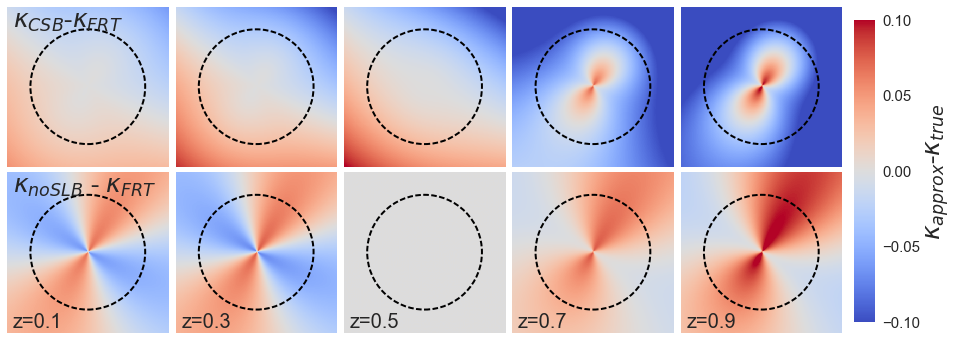

In [7]:
# kappa mapps vs projected mass density
fig, axes = plt.subplots(2, n, figsize=(n*3, 6), sharex=False, sharey=False)
n_pix = len(kappa_full)
for i in range(n):
    image_full = image_full_list[i]
    image_born = image_born_list[i]
    image_analytic = image_analytic_list[i]
    kappa_full = kappa_full_list[i]
    kappa_born = kappa_born_list[i]
    kappa_analytic = kappa_analytic_list[i]
    mag_full = mag_full_list[i]
    mag_born = mag_born_list[i]
    z = z_array[i]
    

    ax = axes[0][i]
    im=ax.matshow((kappa_analytic - kappa_full)/kappa_full,origin='lower', vmin=-0.1, vmax=0.1, cmap="coolwarm")
    plt.setp(ax.get_xticklabels(), visible=False)
    plt.setp(ax.get_yticklabels(), visible=False)
    circle = plt.Circle((n_pix/2., n_pix/2.), n_pix/2.8, color='k', linewidth=2.0, linestyle='--', fill=False)
    ax.add_artist(circle)
    if i == 0:
        ax.text(10, 260, r"$\kappa_{CSB}$-$\kappa_{FRT}$", fontsize=25)

        
    ax = axes[1][i]
    ax.text(10, 10, "z=%s"%(z), fontsize=20)
    im=ax.matshow((kappa_born - kappa_full)/kappa_full,origin='lower', vmin=-0.1, vmax=0.1, cmap="coolwarm")
    plt.setp(ax.get_xticklabels(), visible=False)
    plt.setp(ax.get_yticklabels(), visible=False)
    circle = plt.Circle((n_pix/2., n_pix/2.), n_pix/2.8, color='k', linewidth=2.0, linestyle='--', fill=False)
    ax.add_artist(circle)
    if i == 0:
        ax.text(10, 260, r"$\kappa_{noSLB}$ - $\kappa_{FRT}$", fontsize=25)

fig.subplots_adjust(right=0.94)
cbar_ax = fig.add_axes([0.91, 0.15, 0.02, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax, ticks=[-0.1,-0.05,0,0.05,0.1])    
cbar.ax.set_ylabel(r'$\kappa_{approx}$-$\kappa_{true}$', fontsize=25)
cbar.ax.tick_params(labelsize=15)

f.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=0.9, top=None, wspace=0.03, hspace=0.03)
#plt.savefig('/Users/sibirrer/Cosmology/Strong_Lensing/Papers/StrongWeak/environment_z_kappa.pdf', format='pdf')
plt.show()